# Initialization values
The simulation will start using the parameter values defined below. Read on to see what this means.  To run the notebook, click "Restart and run all" from the kernel menu above.

In [3]:
from corona_sim_aux2 import *
N0=10000 # initial population size
I0=10 # initial number of infected
contact_rate=25 # c: contacts per day
transmission_probability=0.01 #p:  probability
mortality_rate=0.03 # m: proportion of cases that end in death
infection_duration=10 # d: number of days
detection_probability=0.0 # p_q: probability of detection for quarantine
max_quarantine=20 # c_q: maximum number of people to quarantine per day
vaccination_rate=0.0 # u: number of people to vaccinate per day
t_max=500 # end time for simulation
recovery_rate_increase_factor=0.0 # k_r: amount to increase the recovery rate
adoption_time=0 # t: time in days
abandonment_time=t_max # t: time in days
contact_rate_reduction_factor=0.0 # k: proportion, zero: no intervention, one: all interaction stops

#  Notebook Overview
The plot below shows a simulation of a COVID-19 outbreak in the united states. 

Here is a guide to understanding the names of the relevant variables:
* $S$ is the number of people who are **susceptible** to the coronavirus.
* $I$ is the number of people who are  **infected** with the coronavirus.
* $R$ is the number of people who have  **recovered** and are now immune to the coronavirus.
* $D$ is the number of people who have **died** from the corona virus.
* $Q$ is the number of people who have been **quarantined** with the corona virus.
* $V$ is the number of people who have been **vacinated** with the corona virus.


and parameters:

 * $c$ is the **contact rate** (the number of face to face interactions that each person has per day) 
 * $p_t$ is the **transmission probability** of the coronavirus during an interaction
 * $d$ is the **average infection duration** in days
 * $m$ is the **mortality rate** (the proportion of infections that end in death)
 * $t_b$ is the **adoption time** (the time when social distancing measures are adopted)
 * $t_e$ is the **abandonment time** (the time when social distancing measures are abandoned)
 * $k_c$ is the **contact rate reduction factor** (the amount we reduce the contact rate by social distancing)
 * $k_r$ is the **recovery rate increase factor** (the amount we increase the recovery rate by social distancing)
 * $p_q$ is the **detection probability for quantining** of the coronavirus during an interaction
 * $c_q$ is the **maximum number of quarantines** per day.
 * $u$ is the **vacination rate** in maximum number of people per day. 
      
If you are interested in reading about the details of the model, and understanding what each parameter means, scroll down to the bottom. 

Otherwise, try moving the sliders to change the parameters of the model to see how our decisions can affect the severity of an outbreak like COVID-19.  

<IPython.core.display.Javascript object>


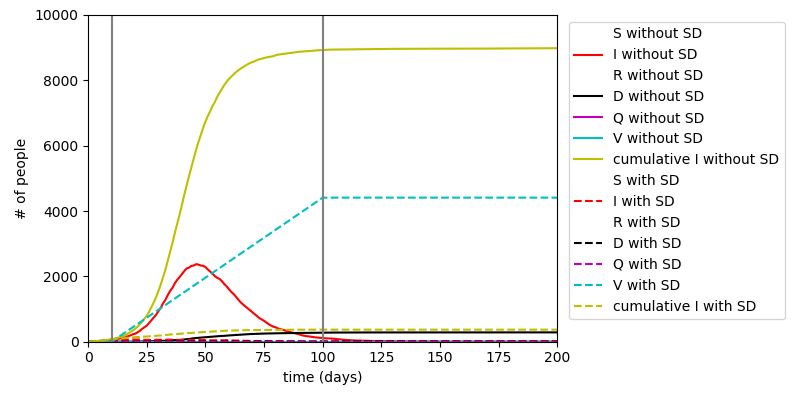

GridBox(children=(FloatSlider(value=200.0, description='t range', max=200.0, style=SliderStyle(description_wid…

Output()

In [4]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
plots,params,out,ui=make_interactive_plot(N0=N0,
                  I0=I0,
                  contact_rate=contact_rate,
                  transmission_probability=transmission_probability,
                  mortality_rate=mortality_rate,
                  infection_duration=infection_duration,
                  detection_probability=detection_probability,
                  max_quarantine=max_quarantine,
                  vaccination_rate=vaccination_rate,     
                  adoption_time=adoption_time,
                  abandonment_time=abandonment_time,
                  contact_rate_reduction_factor=contact_rate_reduction_factor,
                  recovery_rate_increase_factor=0,
                  t_max=200                              )
display(ui,out)
plt.show()

# todo: update description, update R0 calculations.

Note how early implementing (and following!) social distancing guidlines can have a dramatic effect on the time course of the disease!

# More details on how the model works


Suppose that the US population can be divided into 4 categories:
* S: Those who are **susceptible** to the coronavirus.
* I: Those who are **infected** with the coronavirus and not quarantined.
* R: Those who are **recovered** and immune to the coronavirus.
* D: Those who have **died** from the corona virus.
* Q: Those who have been infected with the coronavirus, identified as such and **quarantined**.
* V: Those who have been **vaccinated** and are therefore immune to the coronavirus.
For simplicity we will let $N$ denote the entire living population.

The number of people in each category can change due to the following events:

1. Infection:  A susceptible person interacts with an infected person and the result is both people are infected.
$$S+I\rightarrow 2I$$
The total number of infections in a given window of time is given by $\Delta t cp_t SI/N$ where 
   * $\Delta t$ is the window of time in days
   * $c$ is the **contact rate**, i.e. the number of interactions that each person has per day 
   * $p_t$ is the **transmission probability** during an interaction
   * $S$ is the number of susceptible people in the population
   * $I/N$ is the probability that an interaction is with an infected person
2. Recovery: An infected or quarantined person can recover from the disease.
$$I \textrm{ or } Q\rightarrow R$$
The total number of recoveries in a given window of time  is given by $\Delta t r I$ 
  * $\Delta t$ is the window of time in days
  * $r$ is the **recovery rate* (i.e. the probability that person recovers on a given day)
  * $I$ is the number of infected people (who could potentially recover).
3. Death: An infected or quarantined person can die from the disease.
$$I \textrm{ or } Q\rightarrow D$$
The total number of recoveries in a given window of time is given by $\Delta t \delta I$ 
  * $\Delta t$ is the window of time in days
  * $\delta$ is the death rate (i.e. the probability that person dies on a given day)
  * $I$ is the number of infected people (who could potentially recover).

To simplify matters we will define variables $d$ for the **infection duration** and $m$ for the **mortality rate** so that the death rate is $\delta=m/d$ and recovery rate is $r=(1-m)/d$. 

There are multiple ways that one can attempt to combat an epidemic or pandemic like COVID-19. We will introduce a parameter $t_b$ for the time when these measures are adopted and $t_e$ for the time when these measures are abandoned:

1. **Quarantine**: By isolating infected people from the general population, we can reduce the likelihood that a susceptible person will interact with an infected person.  Unfortunately, this is difficult to do, since it involves tracking down sick people along with everyone they have been in contact with. So we will model this by setting a cap $c_q$ on the number of people that can be quarantined each day.  We will also assume that our ability to identify people that are infected is limited.  So if we quantine someone, there we quarantine the right people with probability $p_q$.  Once an infected person is quarantined we will assume that they are no longer able to infect other people.

$$I\rightarrow Q$$
The total number of (effective) quarantines in a given window of time is given by $ p_q \min(\Delta t c_q,I)$ 
  * $\Delta t$ is the window of time in days
  * $p_q$ is the detection probability for quarantine (i.e. the probability that the authorities are able to identify an infected person in order to quarantine them)
  * $c_q$ is the maximum number of infected people that can be quarantined each day.
  * $I$ is the number of infected people (who could potentially be quarantined).
  
2. **Mitigation and Suppression**: We can try to reduce the contact rate by banning large gatherings and implementing social distancing measures.  We can model the effect of these measures by reducing the contact rate.  In other words, when social distancing measures are adopted we can replace $c$ with $(1-k_c)c$ where $k_c$ is the **contact rate reduction factor**. The basic reproduction ratio $R_0$ represents the average number of people that each sick person will infect during the early stages of an epidemic. If this quantity is greater than 1 then the number of newly infected people will grow exponentially, but if it is less than 1, then the number of new cases will decrease.  We call this strategy **mitigation** if $R_0$ remains greater than 1 after measures have been adopted and **suppression** if $R_0$ drops below 1.

3. **Vaccination**: By removing people from the susceptible population we can slow the growth of the epidemic. We model this by moving a susceptible person wo receives a vaccination to the vaccinated category givign them immunity without ever getting the infection.
$$S\rightarrow V$$
The total number of vaccinations in a given window of time is given by $ \min(\Delta t u,S)$ 
  * $\Delta t$ is the window of time in days
  * $u$ is the number of people who are vaccinated 
  * $S$ is the number of susceptible people (who could potentially be given the vaccine).
4. **Treatement**:  By treating the sick, we can reduce the duration of the infection giving people less time to spread the disease.  We model this by increasing the recovery rate $r$ and replacing it with $r(1+k_r)$.  This will reduce the number of people that each sick person infects.
 

We can then simulate this probabilitic process with the help of a random number generator and see how different variables affect the outcome.